# IMPORTING LIBRARIES & DATA #

In [3]:
import os

# List files in 'data' directory
data_folder = 'data'
files = os.listdir(data_folder)

print("Files in 'data' folder:")
for f in files:
    print(f)


Files in 'data' folder:
test_data_solution.txt
train_data.txt
test_data.txt
description.txt


In [4]:
import pandas as pd 
import warnings
warnings. filterwarnings("ignore")
data= pd.read_csv("data/description.txt")
data

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [5]:
def load_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = f.readlines()
    data = [line.strip().split(' ::: ') for line in data]
    return data

In [6]:
train_data = load_data("data/train_data.txt")
train_df = pd.DataFrame(train_data, columns=['ID', 'Title', 'Genre', 'Description'])


test_data = load_data("data/test_data.txt")

test_df = pd.DataFrame(test_data, columns=['ID', 'Title', 'Description'])

test_solution = load_data("data/test_data_solution.txt")
test_solution_df = pd.DataFrame(test_solution, columns=['ID', 'Title', 'Genre', 'Description'])

In [7]:
print("Train Data:")
train_df


Train Data:


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


# TEXT VECTORIZATION #

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Initialize and fit the vectorizer on training data
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(train_df["Description"])

# Step 2: Use the fitted vectorizer to transform the test data
X_test_tfidf = vectorizer.transform(test_df["Description"])

# Step 3: Print the shapes
print(f"Training data shape: {X_train_tfidf.shape}")
print(f"Test data shape: {X_test_tfidf.shape}")


Training data shape: (54214, 10000)
Test data shape: (54200, 10000)


# ENCODING TARGET LABEL #

In [9]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Genre'])

print(f"Unique genres in the training data: {label_encoder.classes_}")


Unique genres in the training data: ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'game-show' 'history' 'horror'
 'music' 'musical' 'mystery' 'news' 'reality-tv' 'romance' 'sci-fi'
 'short' 'sport' 'talk-show' 'thriller' 'war' 'western']


# LOGISTIC REGRESSION #

In [10]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)

y_pred = lr_model.predict(X_test_tfidf)
predicted_genres = label_encoder.inverse_transform(y_pred)
test_df['Predicted_Genre'] = predicted_genres
print(test_df[['Title', 'Predicted_Genre']])


                                Title Predicted_Genre
0                Edgar's Lunch (1998)           drama
1            La guerra de papá (1977)           drama
2         Off the Beaten Track (2010)     documentary
3              Meu Amigo Hindu (2015)           drama
4                   Er nu zhai (1955)           drama
...                               ...             ...
54195  "Tales of Light & Dark" (2013)           drama
54196     Der letzte Mohikaner (1965)           drama
54197             Oliver Twink (2007)          comedy
54198               Slipstream (1973)           drama
54199       Curitiba Zero Grau (2010)     documentary

[54200 rows x 2 columns]


In [11]:

test_df['Predicted_Genre'] = predicted_genres
merged_df = pd.merge(
    test_solution_df[['ID', 'Genre']],
    test_df[['ID', 'Predicted_Genre']],
    on='ID'
)

print(merged_df)


          ID        Genre Predicted_Genre
0          1     thriller           drama
1          2       comedy           drama
2          3  documentary     documentary
3          4        drama           drama
4          5        drama           drama
...      ...          ...             ...
54195  54196       horror           drama
54196  54197      western           drama
54197  54198        adult          comedy
54198  54199        drama           drama
54199  54200        drama     documentary

[54200 rows x 3 columns]


In [12]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(merged_df['Genre'], merged_df['Predicted_Genre'])
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(merged_df['Genre'], merged_df['Predicted_Genre']))


Accuracy: 0.5945

Classification Report:
              precision    recall  f1-score   support

      action       0.51      0.30      0.37      1314
       adult       0.64      0.25      0.36       590
   adventure       0.67      0.16      0.25       775
   animation       0.59      0.04      0.08       498
   biography       0.00      0.00      0.00       264
      comedy       0.54      0.60      0.57      7446
       crime       0.41      0.03      0.06       505
 documentary       0.68      0.87      0.76     13096
       drama       0.55      0.79      0.65     13612
      family       0.48      0.08      0.14       783
     fantasy       0.61      0.03      0.06       322
   game-show       0.90      0.50      0.64       193
     history       0.00      0.00      0.00       243
      horror       0.66      0.57      0.61      2204
       music       0.68      0.46      0.55       731
     musical       0.45      0.02      0.03       276
     mystery       0.25      0.00      0

# MULTINOMIAL NAIVE BAYES #

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict genres on test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Convert predicted labels back to genre names
predicted_genres_nb = label_encoder.inverse_transform(y_pred_nb)

# Add predictions to test DataFrame
test_df['Predicted_Genre_NB'] = predicted_genres_nb

# Merge with actual test solution for evaluation
merged_df_nb = pd.merge(test_solution_df, test_df[['ID', 'Predicted_Genre_NB']], on='ID')

# Evaluate the model
accuracy_nb = accuracy_score(merged_df_nb['Genre'], merged_df_nb['Predicted_Genre_NB'])
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

print("\nNaive Bayes Classification Report:")
print(classification_report(
    merged_df_nb['Genre'],
    merged_df_nb['Predicted_Genre_NB'],
    target_names=label_encoder.classes_
))


Naive Bayes Accuracy: 0.5092

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      action       0.57      0.03      0.06      1314
       adult       0.46      0.02      0.04       590
   adventure       0.77      0.04      0.08       775
   animation       0.00      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.40      0.46      7446
       crime       0.00      0.00      0.00       505
 documentary       0.56      0.89      0.69     13096
       drama       0.44      0.84      0.58     13612
      family       0.00      0.00      0.00       783
     fantasy       0.00      0.00      0.00       322
   game-show       1.00      0.02      0.04       193
     history       0.00      0.00      0.00       243
      horror       0.77      0.23      0.35      2204
       music       0.89      0.02      0.04       731
     musical       0.00      0.00      0.00       276
     mystery    

#  RANDOM FOREST CLASSIFIER #

In [18]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

predicted_genres_rf = label_encoder.inverse_transform(y_pred_rf)
test_df['Predicted_Genre_RF'] = predicted_genres_rf

merged_df_rf = pd.merge(test_solution_df, test_df[['ID', 'Predicted_Genre_RF']], on='ID')

# Evaluate Random Forest
accuracy_rf = accuracy_score(merged_df_rf['Genre'], merged_df_rf['Predicted_Genre_RF'])
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(
    merged_df_rf['Genre'],
    merged_df_rf['Predicted_Genre_RF'],
    target_names=label_encoder.classes_
))



Random Forest Accuracy: 0.4704
Random Forest Classification Report:
              precision    recall  f1-score   support

      action       1.00      0.00      0.01      1314
       adult       0.50      0.02      0.04       590
   adventure       0.75      0.05      0.10       775
   animation       0.09      0.00      0.00       498
   biography       0.00      0.00      0.00       264
      comedy       0.51      0.23      0.32      7446
       crime       1.00      0.00      0.01       505
 documentary       0.53      0.89      0.66     13096
       drama       0.41      0.83      0.54     13612
      family       0.95      0.02      0.04       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.89      0.33      0.48       193
     history       0.00      0.00      0.00       243
      horror       0.78      0.05      0.09      2204
       music       0.82      0.08      0.15       731
     musical       0.67      0.02      0.04       276
     mystery

# HYPERPARAMETER TUNING & CV SCORES #

In [19]:
lr_model_balanced = LogisticRegression(max_iter=200, class_weight='balanced')
lr_model_balanced.fit(X_train_tfidf, y_train)


LogisticRegression(class_weight='balanced', max_iter=200)

In [20]:
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train_tfidf, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

param_grid_lr = {'C': [0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid_lr, cv=3)
grid_search_lr.fit(X_train_tfidf, y_train)
print("Best Logistic Regression Params:", grid_search_lr.best_params_)


Best Logistic Regression Params: {'C': 1}


In [22]:
param_grid_nb = {'alpha': [0.1, 1, 10]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3)
grid_search_nb.fit(X_train_tfidf, y_train)
print("Best Naive Bayes Params:", grid_search_nb.best_params_)


Best Naive Bayes Params: {'alpha': 0.1}


In [23]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_search_rf.fit(X_train_tfidf, y_train)
print("Best Random Forest Params:", grid_search_rf.best_params_)


Best Random Forest Params: {'max_depth': None, 'n_estimators': 200}


In [24]:
cv_lr = cross_val_score(lr_model, X_train_tfidf, y_train, cv=3)
print(f"Logistic Regression CV Accuracy: {cv_lr.mean():.4f}")

cv_nb = cross_val_score(nb_model, X_train_tfidf, y_train, cv=3)
print(f"Naive Bayes CV Accuracy: {cv_nb.mean():.4f}")

cv_rf = cross_val_score(rf_model, X_train_tfidf, y_train, cv=3)
print(f"Random Forest CV Accuracy: {cv_rf.mean():.4f}")


Logistic Regression CV Accuracy: 0.5824
Naive Bayes CV Accuracy: 0.4961
Random Forest CV Accuracy: 0.4685


# VOTING CLASSIFIER #

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define and train Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=200)),
    ('nb', MultinomialNB()),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard')

voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting = voting_clf.predict(X_test_tfidf)

# Convert predicted labels to genre names
predicted_genres_voting = label_encoder.inverse_transform(y_pred_voting)
test_df['Predicted_Genre_Voting'] = predicted_genres_voting

# Merge predictions with ground truth from test_solution_df
merged_df_voting = pd.merge(test_solution_df, test_df[['ID', 'Predicted_Genre_Voting']], on='ID')

# Evaluate
accuracy_voting = accuracy_score(merged_df_voting['Genre'], merged_df_voting['Predicted_Genre_Voting'])
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print("Voting Classifier Classification Report:")
print(classification_report(
    merged_df_voting['Genre'],
    merged_df_voting['Predicted_Genre_Voting'],
    target_names=label_encoder.classes_
))



Voting Classifier Accuracy: 0.5303
Voting Classifier Classification Report:
              precision    recall  f1-score   support

      action       0.47      0.10      0.16      1314
       adult       0.67      0.15      0.24       590
   adventure       0.68      0.10      0.17       775
   animation       0.57      0.02      0.05       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.46      0.49      7446
       crime       0.50      0.01      0.02       505
 documentary       0.58      0.90      0.71     13096
       drama       0.47      0.84      0.60     13612
      family       1.00      0.00      0.01       783
     fantasy       0.00      0.00      0.00       322
   game-show       0.91      0.31      0.46       193
     history       0.00      0.00      0.00       243
      horror       0.80      0.23      0.36      2204
       music       0.79      0.07      0.13       731
     musical       0.00      0.00      0.00       276
     

# MODEL COMPARISON PLOT #

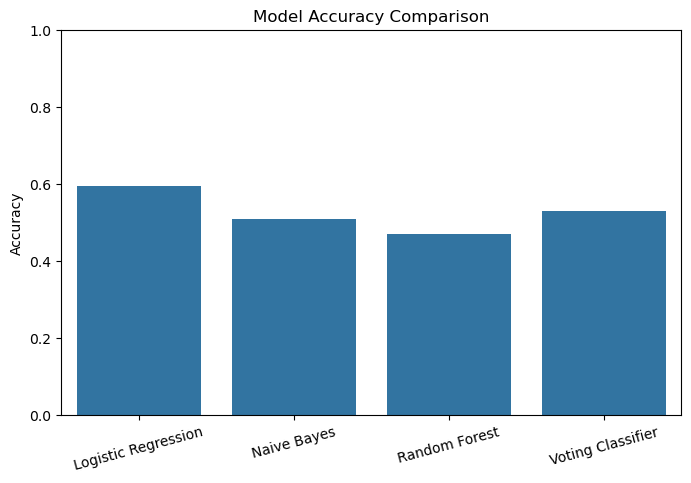

In [26]:
model_accuracies = {
    'Logistic Regression': accuracy,
    'Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf,
    'Voting Classifier': accuracy_voting
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()
